# Analyze iPSYCH coloc & eCAVIAR results

In [1]:
library(tidyverse)
library(data.table)
library("ggsci")

── Attaching packages ──────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ─────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
setwd("../out/")

### coloc results

In [3]:
coloc_eqtl <- read.table("eqtl_PP4_sig.txt", head = T)
coloc_isoqtl <- read.table("isoqtl_PP4_sig.txt", head = T)
coloc_sqtl <- read.table("sqtl_PP4_sig.txt", head = T)
coloc_tri_eqtl <- read.table("tri_eqtl_PP4_sig.txt", head = T)
coloc_tri_isoqtl <- read.table("tri_isoqtl_PP4_sig.txt", head = T)
coloc_tri_sqtl <- read.table("tri_sqtl_PP4_sig.txt", head = T)
coloc_MB <- read.table("MB_PP4_sig.txt", head = T)
coloc_thistle <- read.table("thistle_PP4_sig.txt", head = T)

In [73]:
gwas_loc <- read.table("../data/gwas_indexSNP.tsv", header = T)

In [74]:
df <- gwas_loc %>% group_by(GWAS) %>% count()

In [75]:
eqtl <- coloc_eqtl %>% select(loc, GWAS)
isoqtl <- coloc_isoqtl %>% select(loc, GWAS)
sqtl <- coloc_sqtl %>% select(loc, GWAS)
tri_e <- coloc_tri_eqtl %>% select(locus, GWAS)
tri_i <- coloc_tri_isoqtl %>% select(locus, GWAS)
tri_s <- coloc_tri_sqtl %>% select(locus, GWAS)
mb <- coloc_MB %>% select(Locus, GWAS)
thistle <- coloc_thistle %>% select(Locus, GWAS)
colnames(eqtl) <- colnames(isoqtl) <- colnames(sqtl) <- colnames(tri_e) <- colnames(tri_i) <- colnames(tri_s) <- colnames(mb) <- colnames(thistle) <- c("Locus", "GWAS")
df1 <- rbind(eqtl, isoqtl, sqtl, tri_e, tri_i, tri_s, mb, thistle)

In [76]:
df2 <- df1 %>% group_by(GWAS) %>% summarise(num_loc = n_distinct(Locus))
# df2

In [77]:
df <- df %>% left_join(df2, by = "GWAS")
# df

In [78]:
df[is.na(df$num_loc), 'num_loc'] <- 0

In [79]:
df <- melt(df)

Warning message in melt(df):
“The melt generic in data.table has been passed a grouped_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df). In the next version, this warning will become an error.”
Using GWAS as id variables



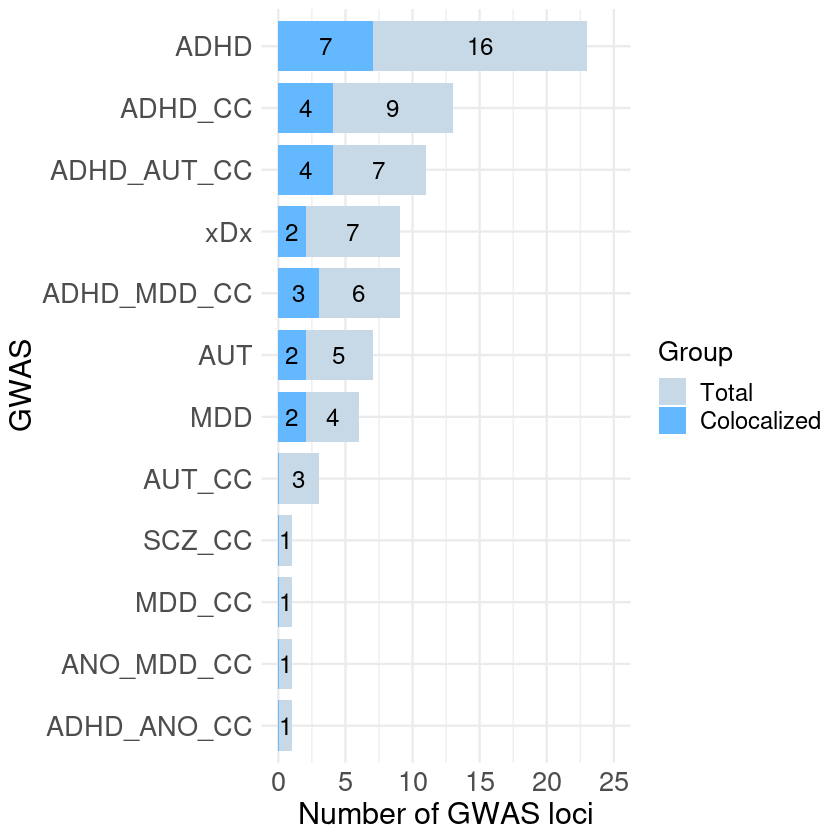

In [80]:
ggplot(df, aes(x = value, y = reorder(GWAS, value), fill = variable)) +
    geom_bar(position = "stack", stat = "identity", width = 0.8) +
    geom_text(aes(label = ifelse(value == 0, "", value)), 
              position = position_stack(vjust = 0.5), 
              size = 5) +
    labs(x = "Number of GWAS loci", y = "GWAS", fill = "Group") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    xlim(0, 25) +
    scale_fill_manual(values = c("n" = "#C7D9E6", "num_loc" = "steelblue1"), labels = c("Total", "Colocalized"))

In [35]:
ggsave("../figures/num_locus_coloc.pdf", height = 6, width = 6)

### eCAVIAR results

In [4]:
e_eqtl <- read.table("eqtl_CLPP_sig.txt", head = T)
e_isoqtl <- read.table("isoqtl_CLPP_sig.txt", head = T)
e_sqtl <- fread("sqtl_CLPP_sig.txt", data.table = F)
e_tri_eqtl <- read.table("tri_eqtl.txt", head = T)
e_tri_isoqtl <- read.table("tri_isoqtl.txt", head = T)
e_tri_sqtl <- read.table("tri_sqtl.txt", head = T)
e_MB <- read.table("MB_CLPP_sig.txt", head = T)
e_thistle <- read.table("thistle_CLPP_sig.txt", head = T)

In [82]:
eqtl <- e_eqtl %>% select(locus, gwas)
isoqtl <- e_isoqtl %>% select(locus, gwas)
sqtl <- e_sqtl %>% select(locus, gwas)
tri_e <- e_tri_eqtl %>% select(locus, gwas)
tri_i <- e_tri_isoqtl %>% select(locus, gwas)
tri_s <- e_tri_sqtl %>% select(locus, gwas)
mb <- e_MB %>% select(locus, gwas)
thistle <- e_thistle %>% select(locus, gwas)
colnames(eqtl) <- colnames(isoqtl) <- colnames(sqtl) <- colnames(tri_e) <- colnames(tri_i) <- colnames(tri_s) <- colnames(mb) <- colnames(thistle) <- c("Locus", "GWAS")
df1_ecaviar <- rbind(eqtl, isoqtl, sqtl, tri_e, tri_i, tri_s, mb, thistle)

In [83]:
df2_ecaviar <- df1_ecaviar %>% group_by(GWAS) %>% summarise(num_loc = n_distinct(Locus))
df2_ecaviar

GWAS,num_loc
<chr>,<int>
ADHD,6
ADHD_ANO_CC,1
ADHD_AUT_CC,3
ADHD_CC,4
ADHD_MDD_CC,1
AUT,3
AUT_CC,1
MDD_CC,1
xDx,4


In [84]:
df_ecaviar <- gwas_loc %>% group_by(GWAS) %>% count()

Warning message in melt(df_ecaviar):
“The melt generic in data.table has been passed a grouped_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_ecaviar). In the next version, this warning will become an error.”
Using GWAS as id variables



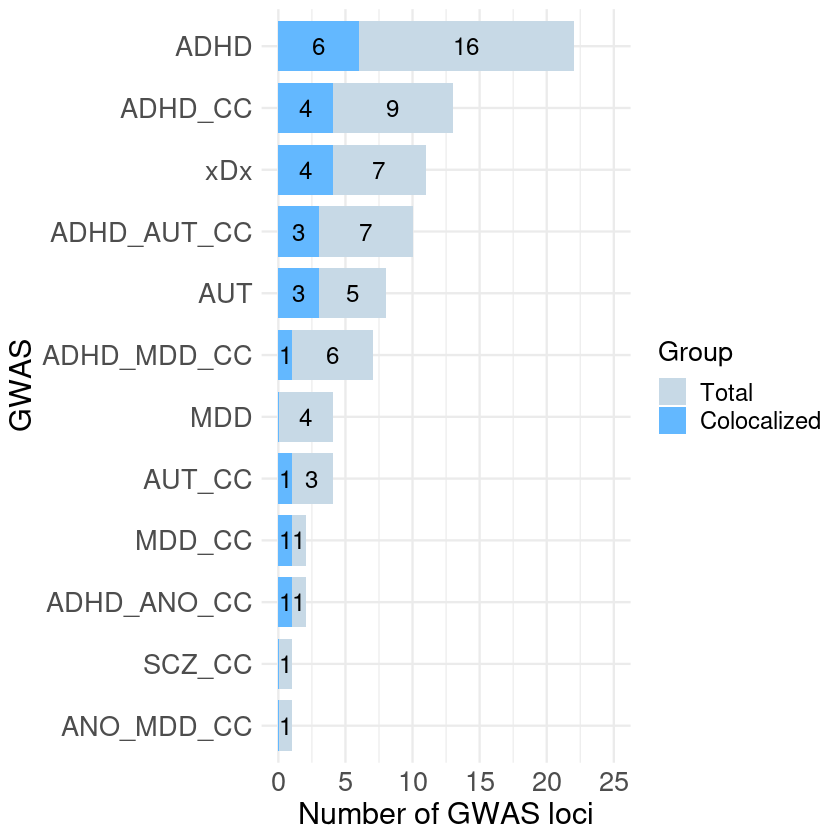

In [85]:
df_ecaviar <- df_ecaviar %>% left_join(df2_ecaviar, by = "GWAS")
df_ecaviar[is.na(df_ecaviar$num_loc), 'num_loc'] <- 0
df_ecaviar <- melt(df_ecaviar)
ggplot(df_ecaviar, aes(x = value, y = reorder(GWAS, value), fill = variable)) +
    geom_bar(position = "stack", stat = "identity", width = 0.8) +
    geom_text(aes(label = ifelse(value == 0, "", value)), 
              position = position_stack(vjust = 0.5), 
              size = 5) +
    labs(x = "Number of GWAS loci", y = "GWAS", fill = "Group") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    xlim(0, 25) +
    scale_fill_manual(values = c("n" = "#C7D9E6", "num_loc" = "steelblue1"), labels = c("Total", "Colocalized"))

In [70]:
ggsave("../figures/num_locus_ecaviar.pdf", height = 6, width = 6)

### compare loci by coloc and eCAVIAR

In [88]:
coloc_loci <- unique(df1$Locus)
ecaviar_loci <- unique(df1_ecaviar$Locus)

In [89]:
length(coloc_loci)
length(ecaviar_loci)
sum(coloc_loci %in% ecaviar_loci)

[1] 24

[1] 24

[1] 14

### eCAVIAR results by locus

In [5]:
e_eqtl_df <- e_eqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, V12)
e_eqtl_df$Annotation <- "devBrain_eQTL"

e_isoqtl_df <- e_isoqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, V12)
e_isoqtl_df$Annotation <- "devBrain_isoQTL"

e_sqtl_df <- e_sqtl %>% 
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, gene.y)
e_sqtl_df$Annotation <- "devBrain_sQTL"

In [6]:
e_tri_eqtl_df <- e_tri_eqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, V12)
e_tri_eqtl_df$Annotation <- "devBrain_tri_eQTL"

e_tri_isoqtl_df <- e_tri_isoqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, V12)
e_tri_isoqtl_df$Annotation <- "devBrain_tri_isoQTL"

e_tri_sqtl_df <- e_tri_sqtl %>% 
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, gene.y)
e_tri_sqtl_df$Annotation <- "devBrain_tri_sQTL"

In [7]:
e_mb_df <- e_MB %>% 
    unite("Gene_SNP", gene, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, gene)
e_mb_df$Annotation <- "MetaBrain_EUR_cortex_eQTL"

e_thistle_df <- e_thistle %>% 
    unite("Gene_SNP", Gene, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas, Gene)
e_thistle_df$Annotation <- "Thistle_EUR_sQTL"

In [8]:
new_column_names <- c("Gene_SNP", "CLPP", "Locus", "GWAS", "Gene", "Annotation")
dataframes_list <- list(e_eqtl_df, e_isoqtl_df, e_sqtl_df,
                        e_tri_eqtl_df, e_tri_isoqtl_df, e_tri_sqtl_df,
                        e_mb_df, e_thistle_df)

set_column_names <- function(df, new_names) {
  names(df) <- new_names
  return(df)
}
new_dataframes <- lapply(dataframes_list, set_column_names, new_names = new_column_names)

In [9]:
df_all <- do.call(rbind, new_dataframes)

In [10]:
head(df_all)

,Gene_SNP,CLPP,Locus,GWAS,Gene,Annotation
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,MST1R_rs2681780,0.0563520,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
2,MST1R_rs9821675,0.0120462,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
3,MST1R_rs1317154,0.0473051,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
4,CAMKV_rs1317154,0.0111055,20,ADHD_CC,CAMKV,devBrain_eQTL
5,MST1R_rs2681780,0.0557382,20,ADHD_CC,MST1R,devBrain_eQTL
6,MST1R_rs1317154,0.0720201,20,ADHD_CC,MST1R,devBrain_eQTL


In [ ]:
# keep protein_coding genes
gtf <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
gtf <- gtf %>% filter(V11 == "protein_coding")

In [124]:
# filter for protein_coding genes only
dim(df_all)
df_all <- df_all %>% filter(Gene %in% gtf$V12)
dim(df_all)

[1] 124   6

[1] 94  6

In [125]:
table(df_all$GWAS)


       ADHD ADHD_AUT_CC     ADHD_CC         AUT         xDx 
         27          35          21           8           3 

In [126]:
head(df_all)

,Gene_SNP,CLPP,Locus,GWAS,Gene,Annotation
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,MST1R_rs2681780,0.0563520,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
2,MST1R_rs9821675,0.0120462,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
3,MST1R_rs1317154,0.0473051,19,ADHD_AUT_CC,MST1R,devBrain_eQTL
4,CAMKV_rs1317154,0.0111055,20,ADHD_CC,CAMKV,devBrain_eQTL
5,MST1R_rs2681780,0.0557382,20,ADHD_CC,MST1R,devBrain_eQTL
6,MST1R_rs1317154,0.0720201,20,ADHD_CC,MST1R,devBrain_eQTL


In [127]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_AUT_CC")

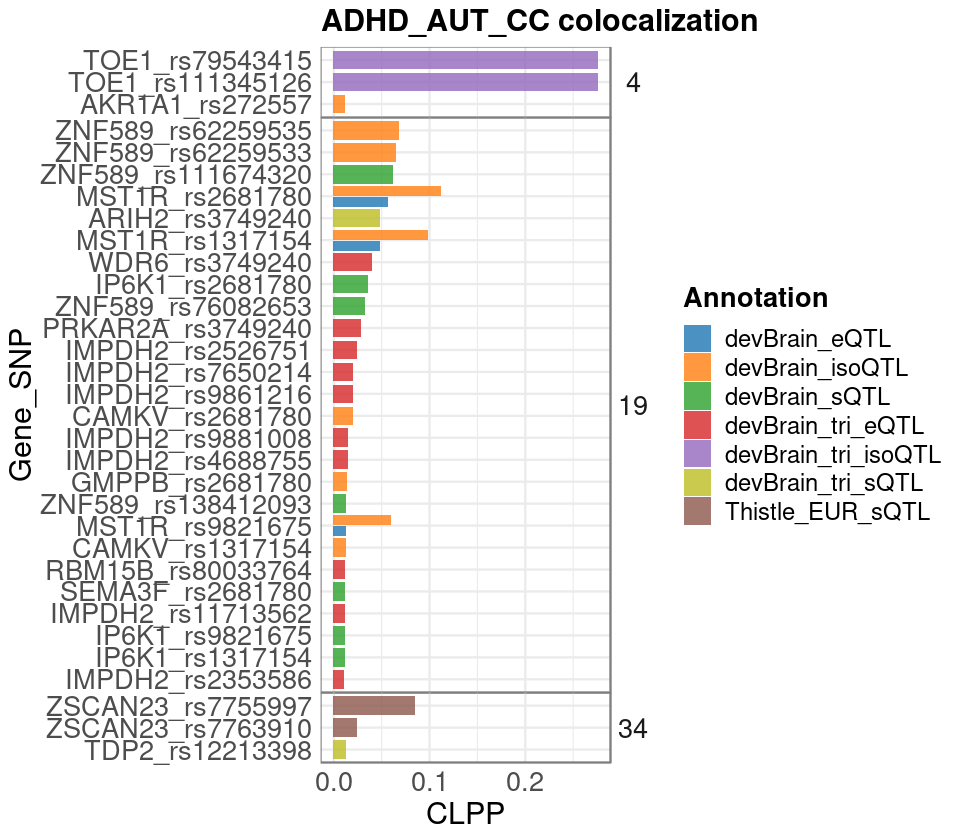

In [129]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_AUT_CC")

df_order <- df_order %>% 
      arrange(Gene_SNP, Locus, Annotation, -CLPP) %>%
      distinct(Gene_SNP, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = unique(Gene_SNP)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_AUT_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [130]:
ggsave("../figures/ADHD_AUT_CC_new_ecaviar.pdf", height = 9, width = 8)

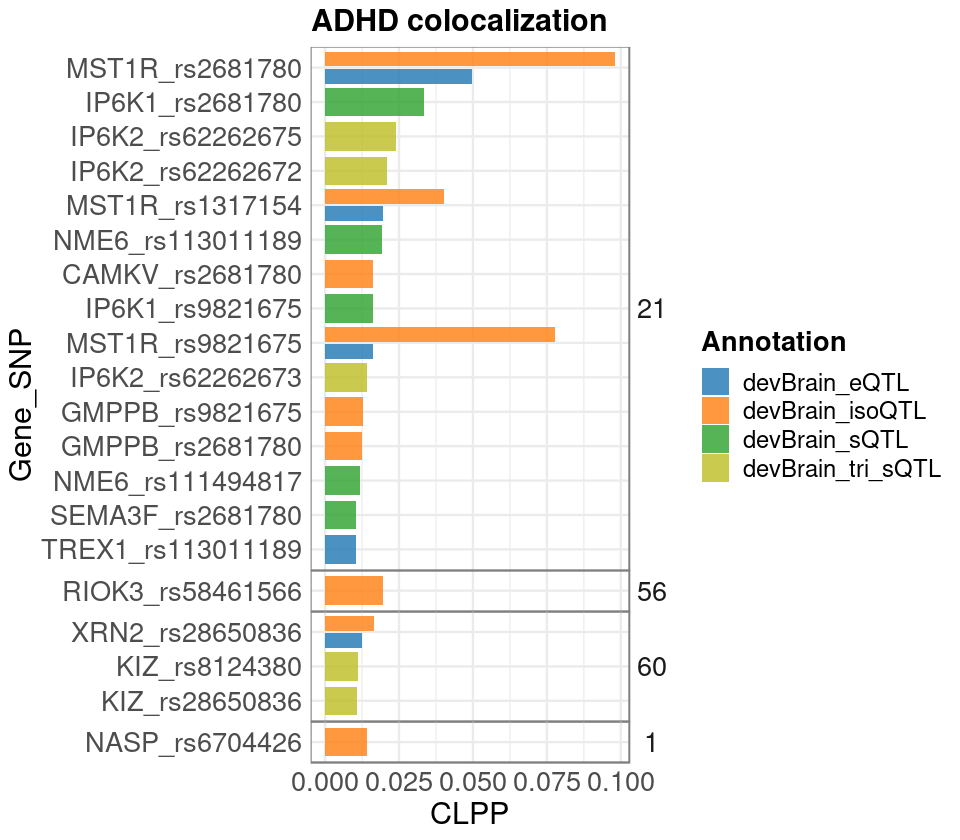

In [131]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD")

df_order <- df_order %>% 
      arrange(Gene_SNP, Locus, Annotation, -CLPP) %>%
      distinct(Gene_SNP, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = unique(Gene_SNP)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [132]:
ggsave("../figures/ADHD_new_ecaviar.pdf", height = 8, width = 8)

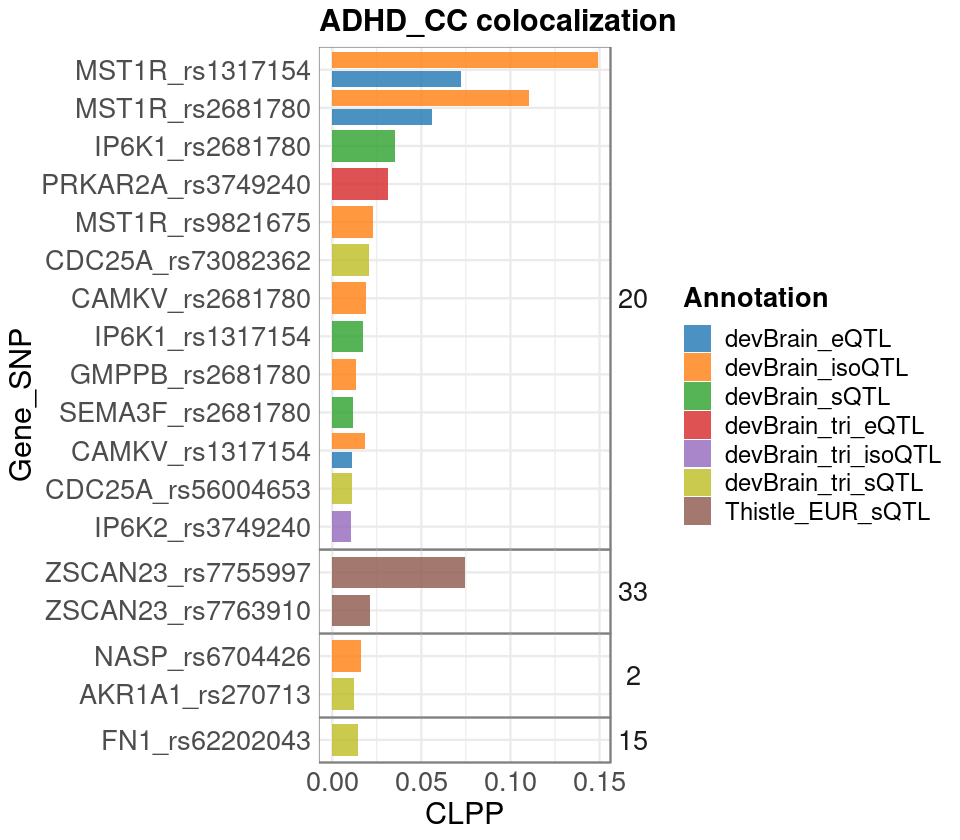

In [133]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_CC")

df_order <- df_order %>% 
      arrange(Gene_SNP, Locus, Annotation, -CLPP) %>%
      distinct(Gene_SNP, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = unique(Gene_SNP)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [134]:
ggsave("../figures/ADHD_CC_new_ecaviar.pdf", height = 8, width = 8)

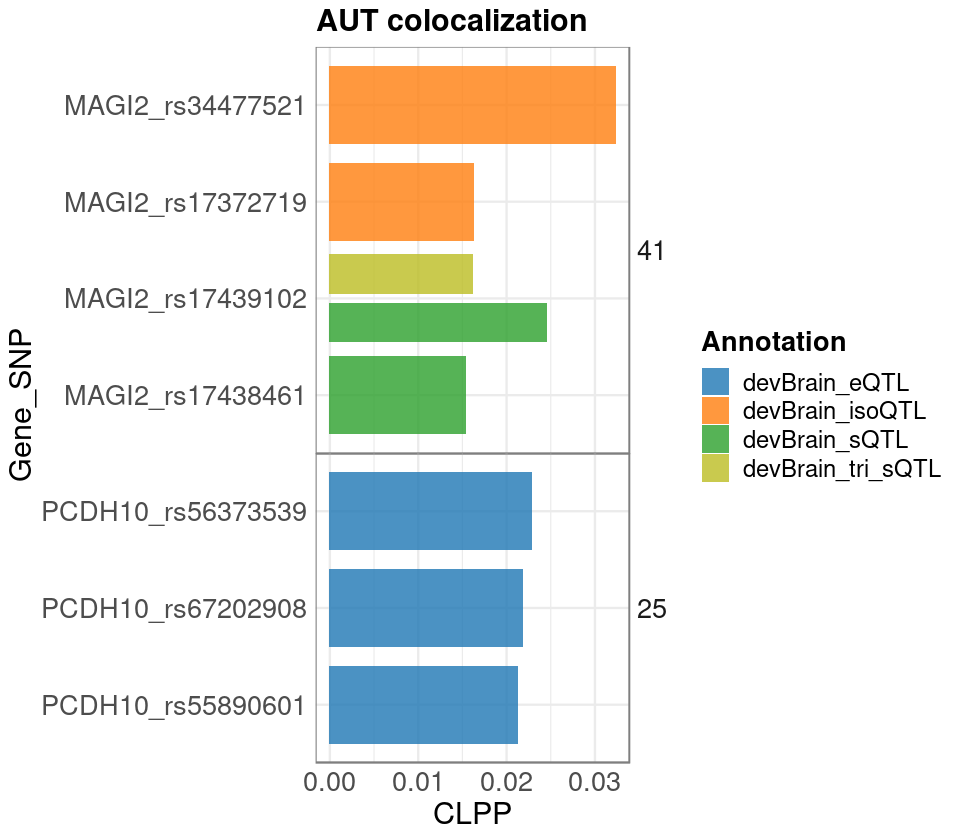

In [135]:
df_order <- df_all %>% 
            filter(GWAS == "AUT")

df_order <- df_order %>% 
      arrange(Gene_SNP, Locus, Annotation, -CLPP) %>%
      distinct(Gene_SNP, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = unique(Gene_SNP)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "AUT colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [136]:
ggsave("../figures/AUT_new_ecaviar.pdf", height = 6, width = 8)

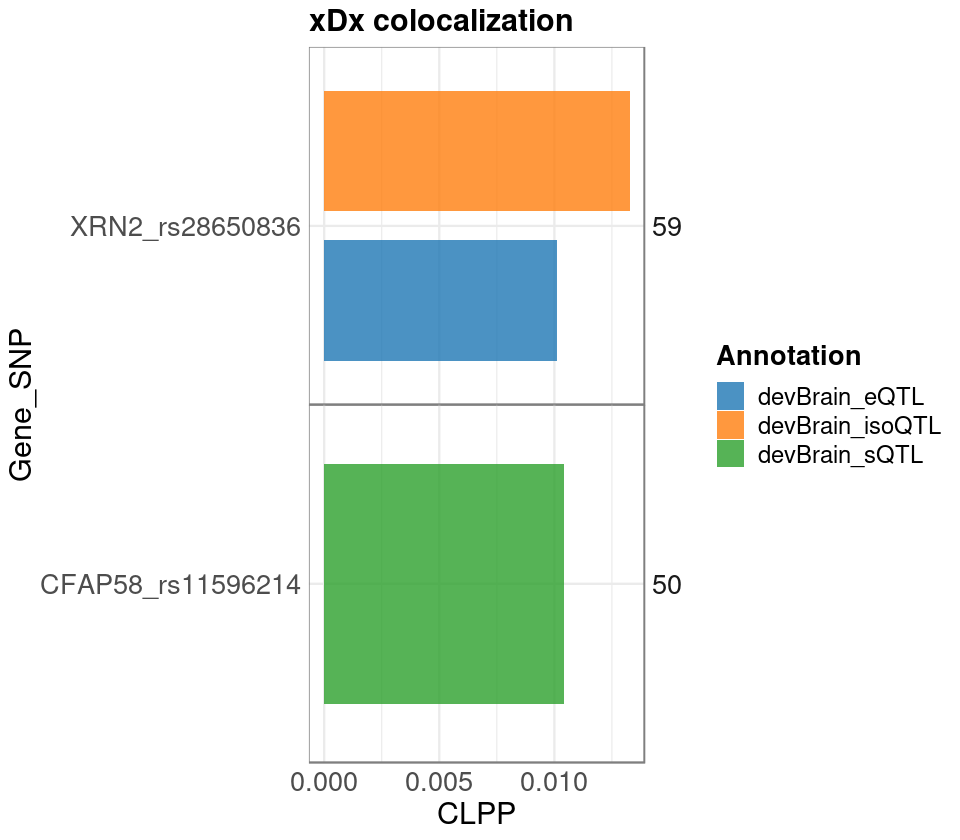

In [137]:
df_order <- df_all %>% 
            filter(GWAS == "xDx")

df_order <- df_order %>% 
      arrange(Gene_SNP, Locus, Annotation, -CLPP) %>%
      distinct(Gene_SNP, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = unique(Gene_SNP)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "xDx colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [138]:
ggsave("../figures/xDx_new_ecaviar.pdf", height = 6, width = 8)

### coloc results by locus

In [11]:
coloc_eqtl_df <- coloc_eqtl %>% 
    select(V12, PP4, loc, GWAS)
coloc_eqtl_df$Annotation <- "devBrain_eQTL"

In [12]:
coloc_isoqtl_df <- coloc_isoqtl %>% 
    select(V12, PP4, loc, GWAS)
coloc_isoqtl_df$Annotation <- "devBrain_isoQTL"

In [13]:
coloc_sqtl_df <- coloc_sqtl %>% 
    select(V12, PP4, loc, GWAS)
coloc_sqtl_df$Annotation <- "devBrain_sQTL"

In [14]:
coloc_tri_eqtl_df <- coloc_tri_eqtl %>% 
    select(gene_name, PP4, locus, GWAS)
coloc_tri_eqtl_df$Annotation <- "devBrain_tri_eQTL"

coloc_tri_isoqtl_df <- coloc_tri_isoqtl %>% 
    select(gene_name, PP4, locus, GWAS)
coloc_tri_isoqtl_df$Annotation <- "devBrain_tri_isoQTL"

coloc_tri_sqtl_df <- coloc_tri_sqtl %>% 
    select(gene_name, PP4, locus, GWAS)
coloc_tri_sqtl_df$Annotation <- "devBrain_tri_sQTL"

In [15]:
coloc_mb_df <- coloc_MB %>% 
    select(GeneSymbol, PP4, Locus, GWAS)
coloc_mb_df$Annotation <- "MetaBrain_EUR_cortex_eQTL"

In [16]:
coloc_thistle_df <- coloc_thistle %>% 
    select(Gene, PP4, Locus, GWAS)
coloc_thistle_df$Annotation <- "Thistle_EUR_sQTL"

In [17]:
new_column_names <- c("Gene", "PP4", "Locus", "GWAS", "Annotation")
dataframes_list <- list(coloc_eqtl_df, coloc_isoqtl_df, coloc_sqtl_df,
                        coloc_tri_eqtl_df, coloc_tri_isoqtl_df, coloc_tri_sqtl_df,
                        coloc_mb_df, coloc_thistle_df)

set_column_names <- function(df, new_names) {
  names(df) <- new_names
  return(df)
}
new_dataframes <- lapply(dataframes_list, set_column_names, new_names = new_column_names)

In [18]:
df_all_coloc <- do.call(rbind, new_dataframes)

**XRN2, MAGI2 full results**

In [21]:
df_all %>% filter(Gene == "XRN2") %>% arrange(-CLPP)
df_all_coloc %>% filter(Gene == "XRN2") %>% arrange(-PP4)

Gene_SNP,CLPP,Locus,GWAS,Gene,Annotation
<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
XRN2_rs28650836,0.0163379,60,ADHD,XRN2,devBrain_isoQTL
XRN2_rs28650836,0.0132452,59,xDx,XRN2,devBrain_isoQTL
XRN2_rs28650836,0.0124571,60,ADHD,XRN2,devBrain_eQTL
XRN2_rs28650836,0.0100989,59,xDx,XRN2,devBrain_eQTL


Gene,PP4,Locus,GWAS,Annotation
<chr>,<dbl>,<int>,<chr>,<chr>
XRN2,0.9993330,59,xDx,devBrain_eQTL
XRN2,0.9871007,59,xDx,devBrain_tri_eQTL
XRN2,0.9836044,58,AUT,devBrain_eQTL
XRN2,0.9721423,60,ADHD,devBrain_isoQTL
XRN2,0.9633331,60,ADHD,devBrain_eQTL
XRN2,0.9455887,58,AUT,devBrain_tri_eQTL
XRN2,0.9177160,59,xDx,devBrain_isoQTL
XRN2,0.8458943,60,ADHD,devBrain_sQTL
XRN2,0.7766195,60,ADHD,devBrain_tri_sQTL


In [22]:
df_all %>% filter(Gene == "MAGI2") %>% arrange(-CLPP)
df_all_coloc %>% filter(Gene == "MAGI2") %>% arrange(-PP4)

Gene_SNP,CLPP,Locus,GWAS,Gene,Annotation
<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
MAGI2_rs34477521,0.0322755,41,AUT,MAGI2,devBrain_isoQTL
MAGI2_rs17439102,0.0245000,41,AUT,MAGI2,devBrain_sQTL
MAGI2_rs17372719,0.0162602,41,AUT,MAGI2,devBrain_isoQTL
MAGI2_rs17439102,0.0161909,41,AUT,MAGI2,devBrain_tri_sQTL
MAGI2_rs17438461,0.0153995,41,AUT,MAGI2,devBrain_sQTL


Gene,PP4,Locus,GWAS,Annotation
<chr>,<dbl>,<int>,<chr>,<chr>
MAGI2,0.9679115,41,AUT,devBrain_isoQTL
MAGI2,0.9473517,41,AUT,devBrain_tri_sQTL
MAGI2,0.9424135,41,AUT,devBrain_sQTL
MAGI2,0.9412280,41,AUT,devBrain_tri_sQTL
MAGI2,0.9363801,41,AUT,devBrain_sQTL
MAGI2,0.9246550,41,AUT,devBrain_sQTL
MAGI2,0.9151806,41,AUT,devBrain_tri_sQTL
MAGI2,0.8870730,41,AUT,devBrain_tri_sQTL


In [14]:
dim(df_all)
df_all <- df_all %>% filter(Gene %in% gtf$V12)
dim(df_all)

[1] 146   5

[1] 113   5

In [15]:
table(df_all$GWAS)


       ADHD ADHD_AUT_CC     ADHD_CC ADHD_MDD_CC         AUT         MDD 
         23          47          24           4          10           2 
        xDx 
          3 

**ADHD**

In [78]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD")

# remove duplicate gene+annotation+locus
df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

In [79]:
df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

In [56]:
df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

In [57]:
mypal <- c("devBrain_eQTL" = "#1F77B4CC", "devBrain_isoQTL" = "#FF7F0ECC", "devBrain_sQTL" = "#2CA02CCC",
            "devBrain_tri_eQTL" = '#D62728CC', "devBrain_tri_isoQTL" = '#9467BDCC', "devBrain_tri_sQTL" = '#BCBD22CC',
            "MetaBrain_EUR_cortex_eQTL" = '#E377C2CC', "Thistle_EUR_sQTL" = '#8C564BCC')

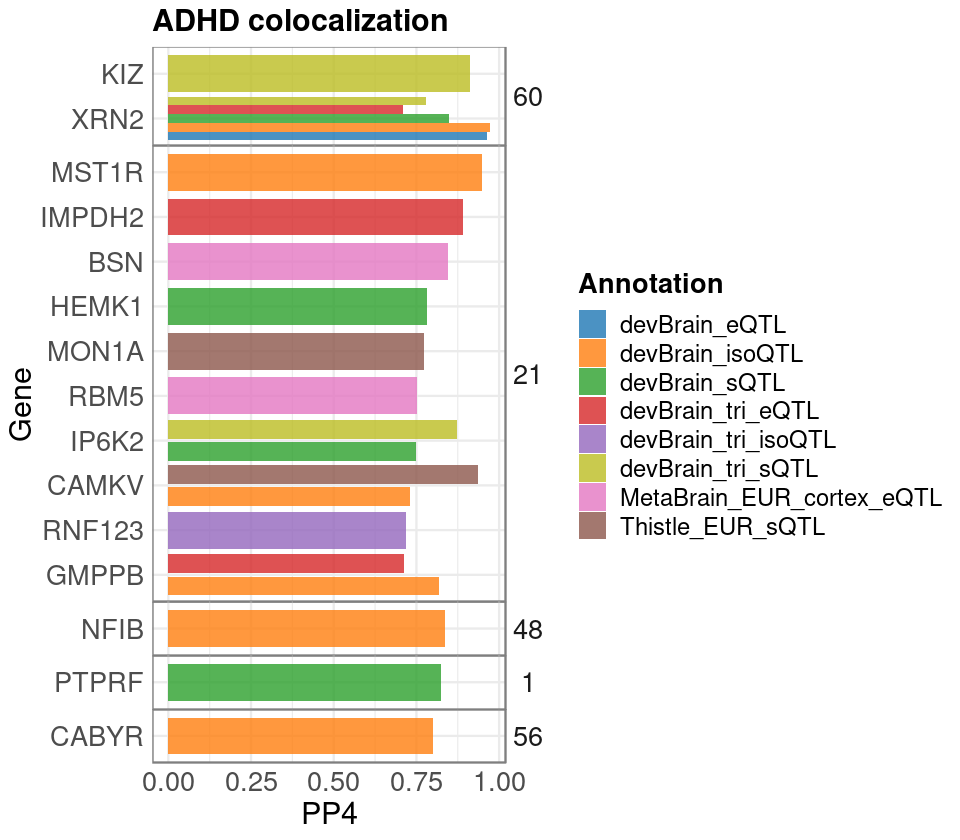

In [76]:
options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "ADHD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [77]:
ggsave("../figures/ADHD_new.pdf", height = 7, width = 8)

**ADHD_AUT_CC**

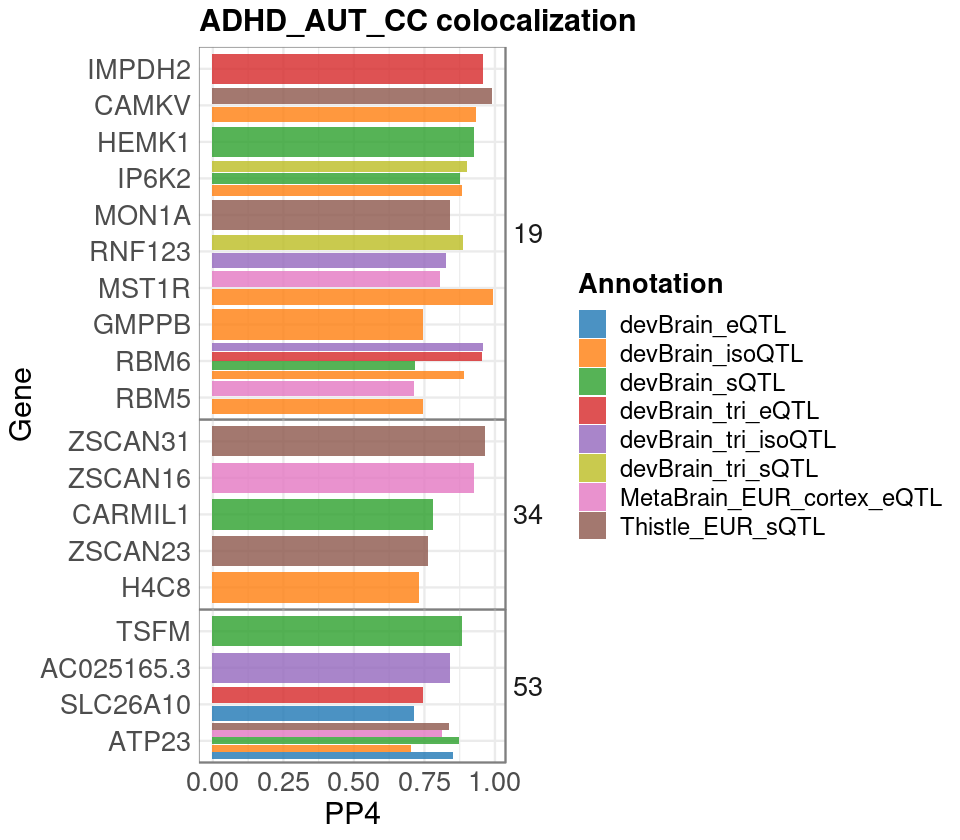

In [81]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_AUT_CC")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "ADHD_AUT_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [82]:
ggsave("../figures/ADHD_AUT_CC_new.pdf", height = 9, width = 8)

**ADHD_CC**

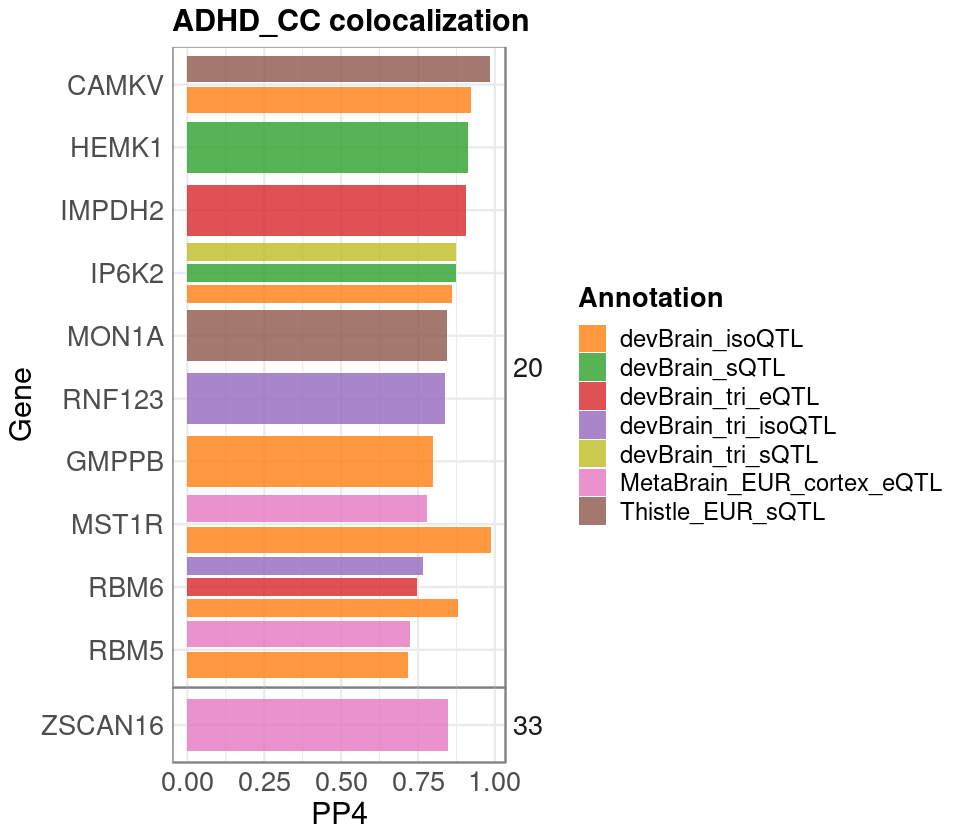

In [88]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_CC")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "ADHD_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [89]:
ggsave("../figures/ADHD_CC_new.pdf", height = 7, width = 8)

**ADHD_MDD_CC**

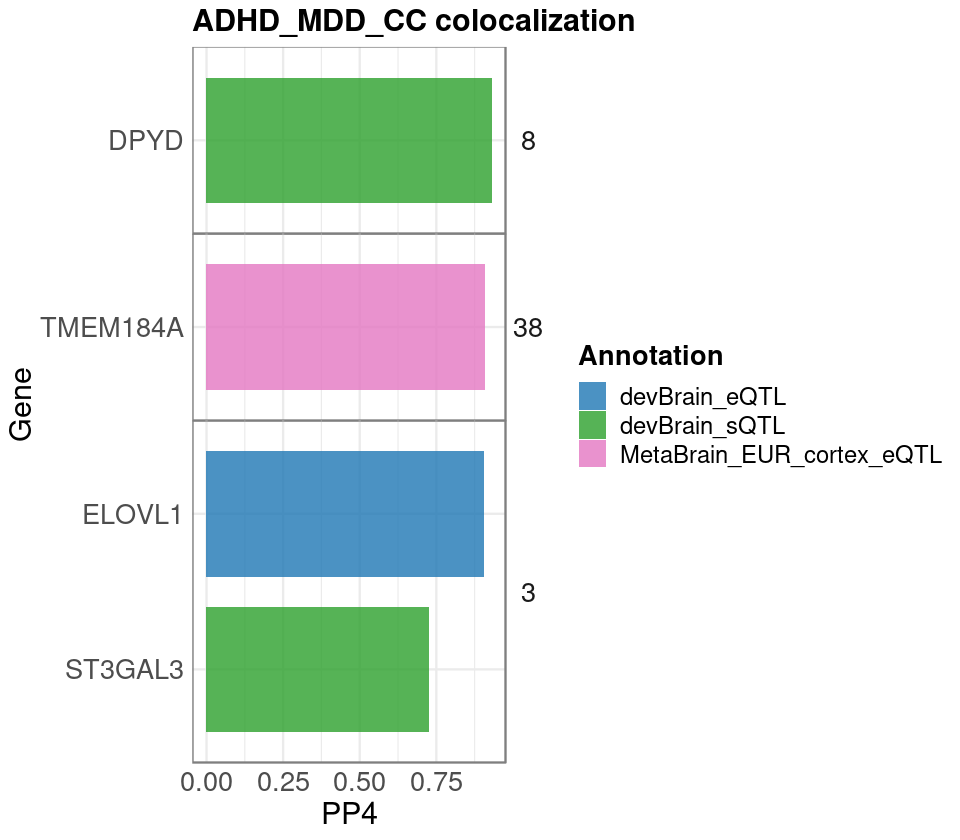

In [90]:
df_order <- df_all %>% 
            filter(GWAS == "ADHD_MDD_CC")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "ADHD_MDD_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [91]:
ggsave("../figures/ADHD_MDD_CC_new.pdf", height = 5, width = 8)

**AUT**

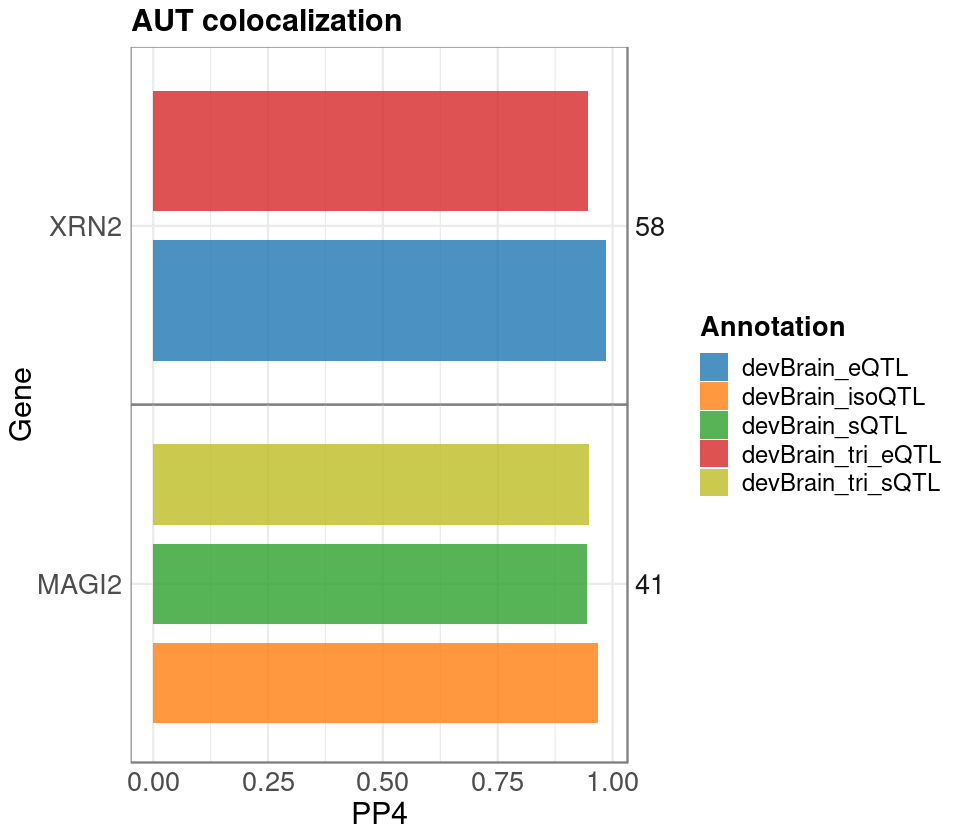

In [92]:
df_order <- df_all %>% 
            filter(GWAS == "AUT")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "AUT colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [93]:
ggsave("../figures/AUT_new.pdf", height = 5, width = 8)

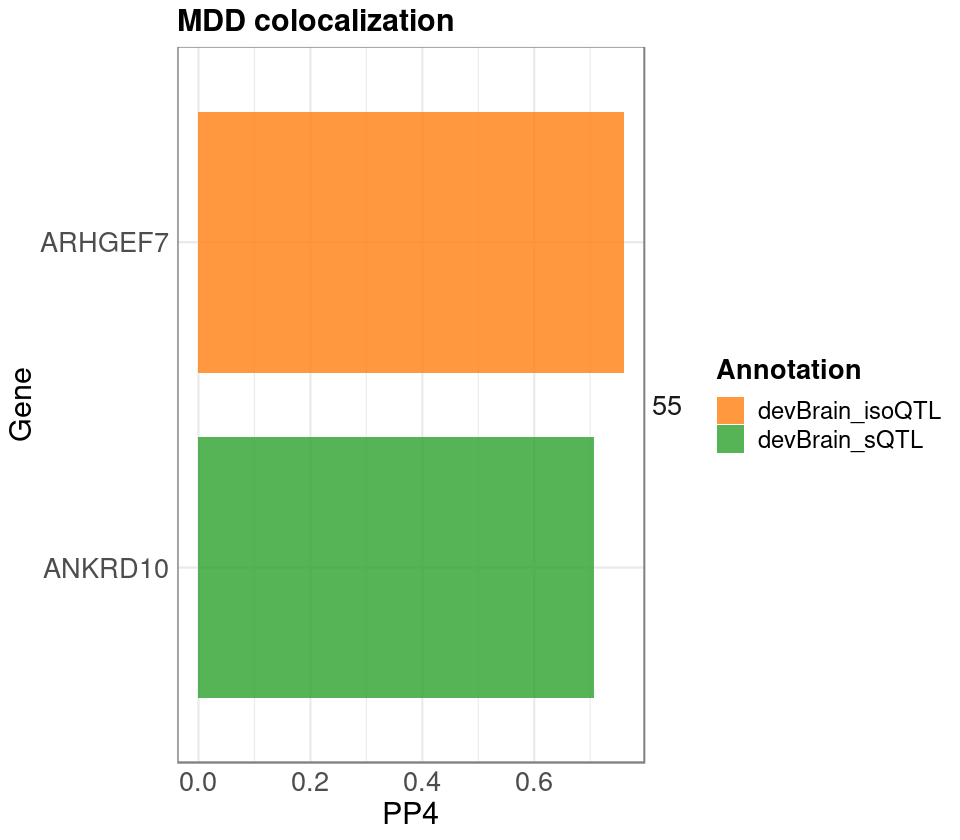

In [94]:
df_order <- df_all %>% 
            filter(GWAS == "MDD")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "MDD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [95]:
ggsave("../figures/MDD_new.pdf", height = 5, width = 8)

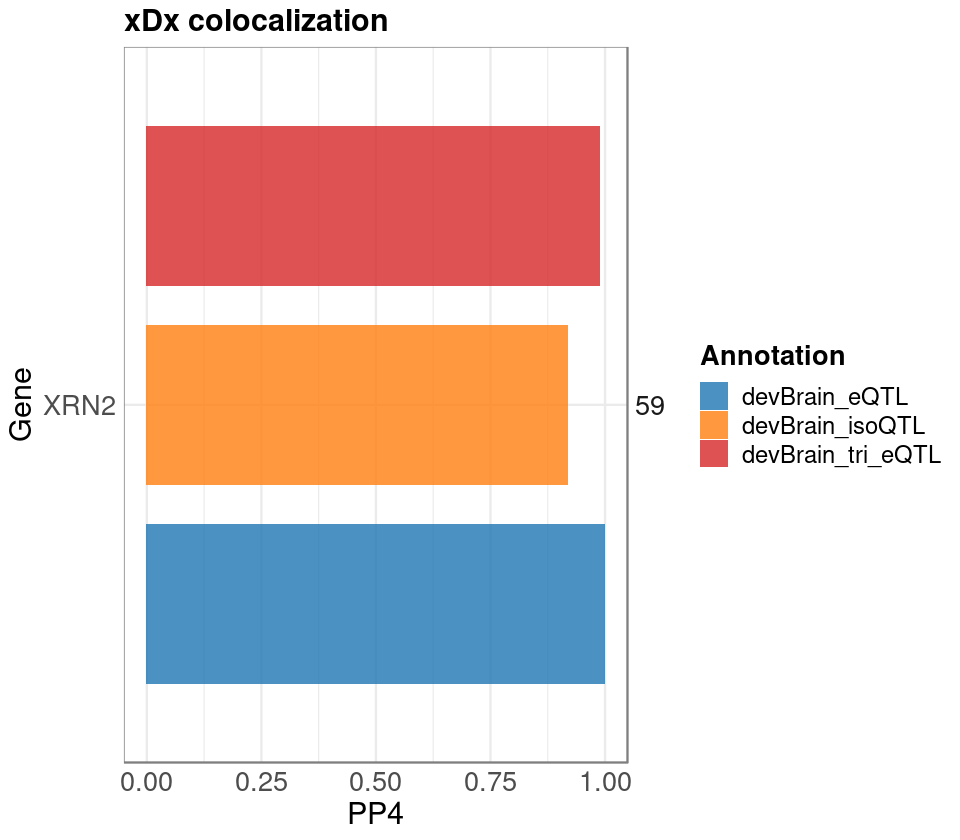

In [96]:
df_order <- df_all %>% 
            filter(GWAS == "xDx")

df_order <- df_order %>% 
      arrange(Gene, Locus, Annotation, -PP4) %>%
      distinct(Gene, Locus, Annotation, .keep_all = TRUE)

df_order <- df_order %>%
            group_by(Locus) %>%
            mutate(top = max(PP4)) %>%
            arrange(top, PP4) %>%
            as.data.frame()

df_order <- df_order %>% mutate(Gene = factor(Gene, levels = unique(Gene)))
df_order <- df_order %>% mutate(Locus = factor(Locus, levels = unique(Locus)))
df_order$Locus <- fct_rev(df_order$Locus)

options(repr.plot.width = 8, repr.plot.height = 7)

ggplot(df_order, aes(x = PP4, y = Gene, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.8, position = position_dodge(width = 1)) +
    facet_grid(Locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "PP4", y = "Gene", title = "xDx colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [97]:
ggsave("../figures/xDx_new.pdf", height = 5, width = 8)

In [80]:
eqtl <- read.table("eqtl_CLPP_sig.txt", head = T)
isoqtl <- read.table("isoqtl_CLPP_sig.txt", head = T)
sqtl <- fread("sqtl_CLPP_sig.txt", data.table = F)
tri_eqtl <- read.table("tri_eqtl.txt", head = T)
tri_isoqtl <- read.table("tri_isoqtl.txt", head = T)
tri_sqtl <- read.table("tri_sqtl.txt", head = T)

In [81]:
pec_eqtl <- read.table("pec_eqtl_CLPP_sig.txt", header = T)
pec_isoqtl <- read.table("pec_isoqtl_CLPP_sig.txt", header = T)

In [82]:
eqtl <- eqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
eqtl$Annotation <- "eQTL"

In [83]:
isoqtl <- isoqtl %>%
#     filter(V11 == "protein_coding") %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
isoqtl$Annotation <- "isoQTL"

In [84]:
sqtl <- sqtl %>%
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
sqtl$Annotation <- "sQTL"

In [85]:
tri_eqtl <- tri_eqtl %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_eqtl$Annotation <- "Tri eQTL"

In [86]:
tri_isoqtl <- tri_isoqtl %>%
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_isoqtl$Annotation <- "Tri isoQTL"

In [20]:
# gtf <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [21]:
# tri_sqtl <- tri_sqtl %>% inner_join(gtf, by = c("gene.y" = "V12"))

In [87]:
tri_sqtl <- tri_sqtl %>%
#     filter(V11 == "protein_coding") %>%
    unite("Gene_SNP", gene.y, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
tri_sqtl$Annotation <- "Tri sQTL"

In [88]:
pec_eqtl <- pec_eqtl %>% 
    unite("Gene_SNP", V12, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
pec_eqtl$Annotation <- "PEC eQTL"

pec_isoqtl <- pec_isoqtl %>% 
    unite("Gene_SNP", gene_name, SNP_ID, sep = "_", remove = FALSE) %>%
    select(Gene_SNP, CLPP, locus, gwas)
pec_isoqtl$Annotation <- "PEC isoQTL"

In [89]:
df <- rbind(eqtl, isoqtl, sqtl, tri_eqtl, tri_isoqtl, tri_sqtl, pec_eqtl, pec_isoqtl)

In [90]:
dim(df)

[1] 213   5

In [91]:
head(df)

,Gene_SNP,CLPP,locus,gwas,Annotation
,<chr>,<dbl>,<int>,<chr>,<chr>
1,MST1R_rs2681780,0.0563520,19,ADHD_AUT_CC,eQTL
2,MST1R_rs9821675,0.0120462,19,ADHD_AUT_CC,eQTL
3,MST1R_rs1317154,0.0473051,19,ADHD_AUT_CC,eQTL
4,CAMKV_rs1317154,0.0111055,20,ADHD_CC,eQTL
5,MST1R_rs2681780,0.0557382,20,ADHD_CC,eQTL
6,MST1R_rs1317154,0.0720201,20,ADHD_CC,eQTL


In [92]:
table(df$gwas)


       ADHD ADHD_ANO_CC ADHD_AUT_CC     ADHD_CC ADHD_MDD_CC         AUT 
         43           1          67          71           6           9 
     AUT_CC         MDD      SCZ_CC         xDx 
          3           2           3           8 

In [93]:
test <- df %>% group_by(gwas) %>% summarise(num_loc = n_distinct(locus))
test

gwas,num_loc
<chr>,<int>
ADHD,7
ADHD_ANO_CC,1
ADHD_AUT_CC,5
ADHD_CC,5
ADHD_MDD_CC,2
AUT,3
AUT_CC,1
MDD,1
SCZ_CC,1


In [94]:
all_loc <- read.table("../data/gwas_indexSNP.tsv", header = T)

In [95]:
head(all_loc)

,SNP,CHR,BP,GWAS,locus
,<chr>,<int>,<int>,<chr>,<int>
1,rs11210887,1,44076019,ADHD,1
2,rs11210887,1,44076019,ADHD_CC,2
3,rs11210887,1,44076019,ADHD_MDD_CC,3
4,rs17371903,1,44070691,ADHD_AUT_CC,4
5,rs12123815,1,96944183,ADHD_CC,5
6,rs34547386,1,96954394,ADHD_MDD_CC,6


In [96]:
df1 <- all_loc %>% group_by(GWAS) %>% count()

In [97]:
df1

GWAS,n
<chr>,<int>
ADHD,16
ADHD_ANO_CC,1
ADHD_AUT_CC,7
ADHD_CC,9
ADHD_MDD_CC,6
ANO_MDD_CC,1
AUT,5
AUT_CC,3
MDD,4


In [98]:
df1 <- df1 %>% left_join(test, by = c("GWAS" = "gwas"))
df1

GWAS,n,num_loc
<chr>,<int>,<int>
ADHD,16,7
ADHD_ANO_CC,1,1
ADHD_AUT_CC,7,5
ADHD_CC,9,5
ADHD_MDD_CC,6,2
ANO_MDD_CC,1,NA
AUT,5,3
AUT_CC,3,1
MDD,4,1


In [99]:
df1[is.na(df1$num_loc), 'num_loc'] <- 0
df1

GWAS,n,num_loc
<chr>,<int>,<int>
ADHD,16,7
ADHD_ANO_CC,1,1
ADHD_AUT_CC,7,5
ADHD_CC,9,5
ADHD_MDD_CC,6,2
ANO_MDD_CC,1,0
AUT,5,3
AUT_CC,3,1
MDD,4,1


In [100]:
df1 <- melt(df1)

Warning message in melt(df1):
“The melt generic in data.table has been passed a grouped_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df1). In the next version, this warning will become an error.”
Using GWAS as id variables



In [101]:
head(df1)

,GWAS,variable,value
,<chr>,<fct>,<int>
1,ADHD,n,16
2,ADHD_ANO_CC,n,1
3,ADHD_AUT_CC,n,7
4,ADHD_CC,n,9
5,ADHD_MDD_CC,n,6
6,ANO_MDD_CC,n,1


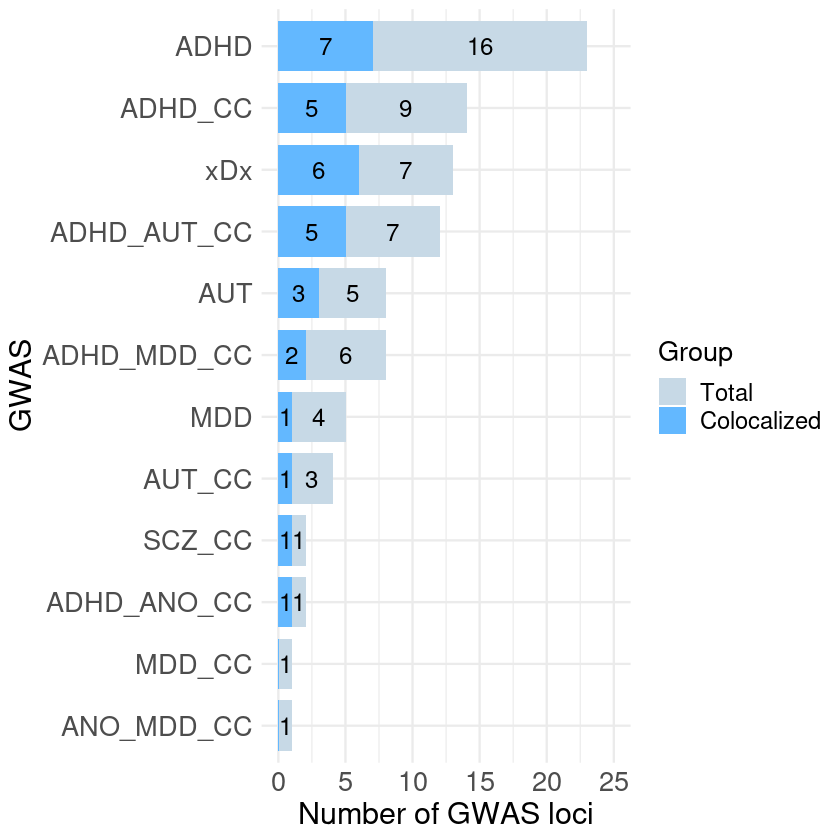

In [102]:
ggplot(df1, aes(x = value, y = reorder(GWAS, value), fill = variable)) +
    geom_bar(position = "stack", stat = "identity", width = 0.8) +
    geom_text(aes(label = ifelse(value == 0, "", value)), 
              position = position_stack(vjust = 0.5), 
              size = 5) +
    labs(x = "Number of GWAS loci", y = "GWAS", fill = "Group") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    xlim(0, 25) +
    scale_fill_manual(values = c("n" = "#C7D9E6", "num_loc" = "steelblue1"), labels = c("Total", "Colocalized"))

In [71]:
ggsave("../figures/num_locus_new.pdf", height = 6, width = 6)

In [72]:
# ggplot(df %>% count(gwas), aes(x = n, y = reorder(gwas, n))) +
#     geom_bar(stat = "identity", fill = "steelblue") +
#     geom_text(aes(label = n), hjust = -0.2, size = 6) +
#     labs(x = "Number of colocalized QTL", y = "GWAS") +
#     theme_minimal() +
#     theme(axis.text = element_text(size = 16),
#           axis.title = element_text(size = 18)) +
#     xlim(0, 35)
# ggsave("../figures/num_qtl.pdf", height = 6, width = 6)

In [73]:
# ggplot(df %>% group_by(gwas) %>% summarise(num_loc = n_distinct(locus)),
#        aes(x = num_loc, y = reorder(gwas, num_loc))) +
#     geom_bar(stat = "identity", fill = "steelblue") +
#     geom_text(aes(label = num_loc), hjust = -0.2, size = 6) +
#     labs(x = "Number of colocalized GWAS loci", y = "GWAS") +
#     theme_minimal() +
#     theme(axis.text = element_text(size = 16),
#           axis.title = element_text(size = 18)) +
#     xlim(0, 5)
# ggsave("../figures/num_locus.pdf", height = 6, width = 6)

In [110]:
head(df)

,Gene_SNP,CLPP,locus,gwas,Annotation
,<chr>,<dbl>,<int>,<chr>,<chr>
1,MST1R_rs2681780,0.0563520,19,ADHD_AUT_CC,eQTL
2,MST1R_rs9821675,0.0120462,19,ADHD_AUT_CC,eQTL
3,MST1R_rs1317154,0.0473051,19,ADHD_AUT_CC,eQTL
4,CAMKV_rs1317154,0.0111055,20,ADHD_CC,eQTL
5,MST1R_rs2681780,0.0557382,20,ADHD_CC,eQTL
6,MST1R_rs1317154,0.0720201,20,ADHD_CC,eQTL


In [113]:
df$Annotation <- factor(df$Annotation, levels = c("eQTL", "isoQTL", "sQTL", "Tri eQTL", "Tri isoQTL", "Tri sQTL",
                                                     "PEC eQTL", "PEC isoQTL"))

In [114]:
adhd <- df %>% filter(gwas == "ADHD")
dim(adhd)

[1] 43  5

In [115]:
# same Gene_SNP, keep the annot with highest CLPP
adhd <- adhd %>% arrange(CLPP)
adhd <- adhd[!duplicated(adhd$Gene_SNP),]

In [116]:
df_order <- adhd %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)
# df_order$Gene_SNP
# df_order$locus

In [117]:
table(adhd$locus)


 1 21 28 46 51 56 60 
 2 23  1  1  3  1  5 

[1] "#1F77B4CC" "#FF7F0ECC" "#2CA02CCC" "#D62728CC" "#9467BDCC" "#8C564BCC"
[7] "#E377C2CC" "#7F7F7FCC" "#BCBD22CC"

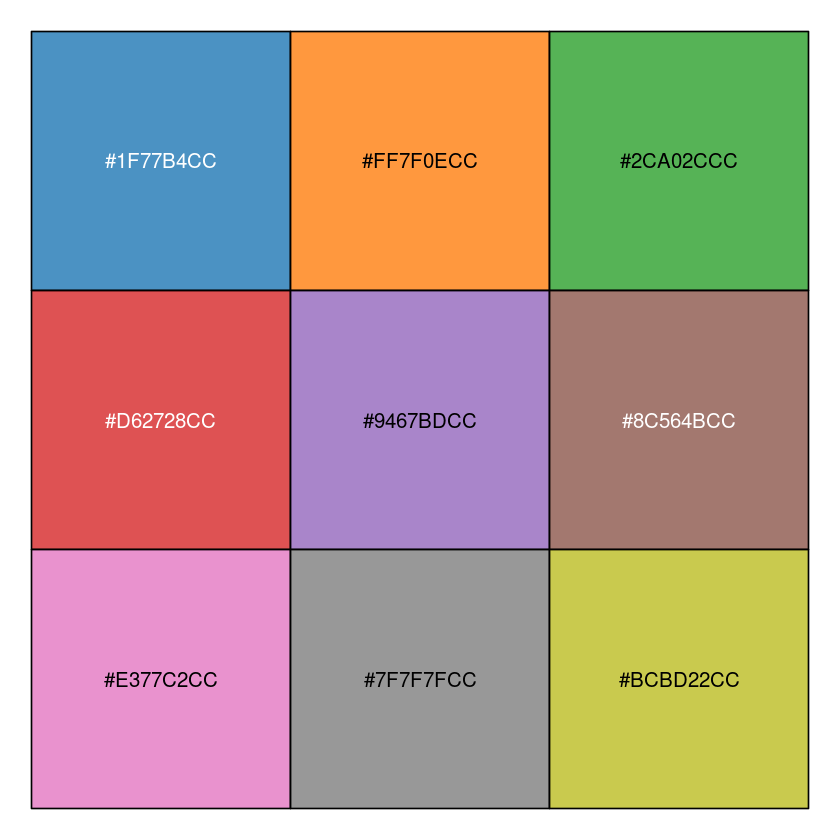

In [107]:
mypal <- pal_d3(alpha = .8)(9)
mypal

library("scales")
show_col(mypal)

In [118]:
mypal <- c("eQTL" = "#1F77B4CC", "isoQTL" = "#FF7F0ECC", "sQTL" = "#2CA02CCC",
            "Tri eQTL" = '#D62728CC', "Tri isoQTL" = '#9467BDCC', "Tri sQTL" = '#BCBD22CC',
            "PEC eQTL" = '#E377C2CC', "PEC isoQTL" = '#8C564BCC')

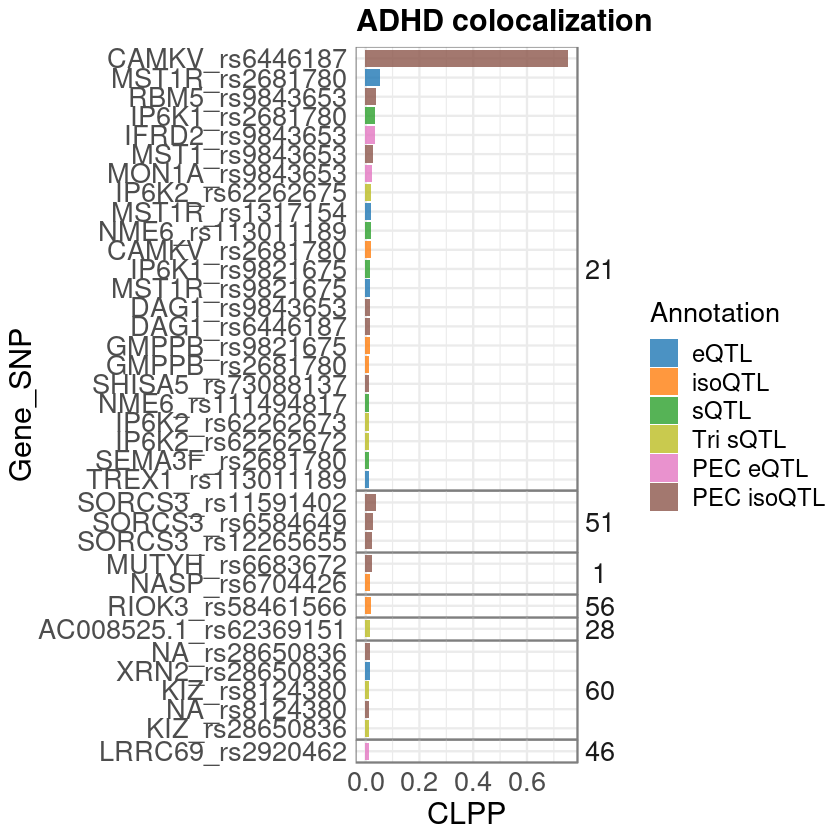

In [119]:
ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [119]:
ggsave("../figures/ADHD.pdf", height = 10, width = 8)

[1] 33  5


 4 19 34 
 3 26  1 

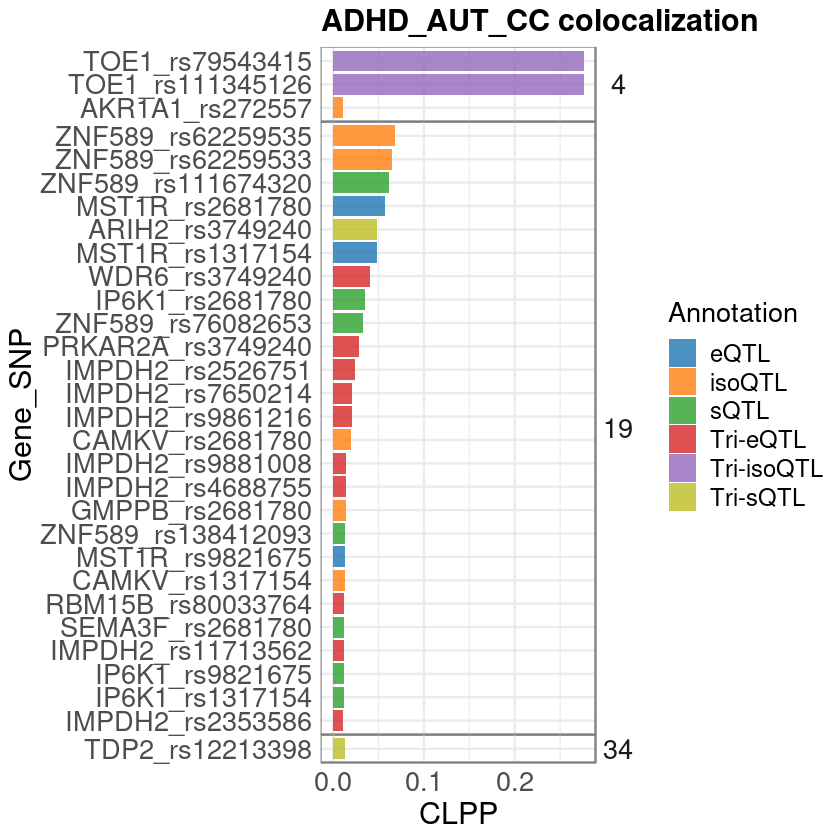

In [120]:
ADHD_AUT_CC <- df %>% filter(gwas == "ADHD_AUT_CC")
dim(ADHD_AUT_CC)

ADHD_AUT_CC <- ADHD_AUT_CC %>% arrange(CLPP)
ADHD_AUT_CC <- ADHD_AUT_CC[!duplicated(ADHD_AUT_CC$Gene_SNP),]

df_order <- ADHD_AUT_CC %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(ADHD_AUT_CC$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_AUT_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

In [121]:
ggsave("../figures/ADHD_AUT_CC.pdf", height = 10, width = 8)

[1] 19  5


 2 15 20 
 2  1 13 

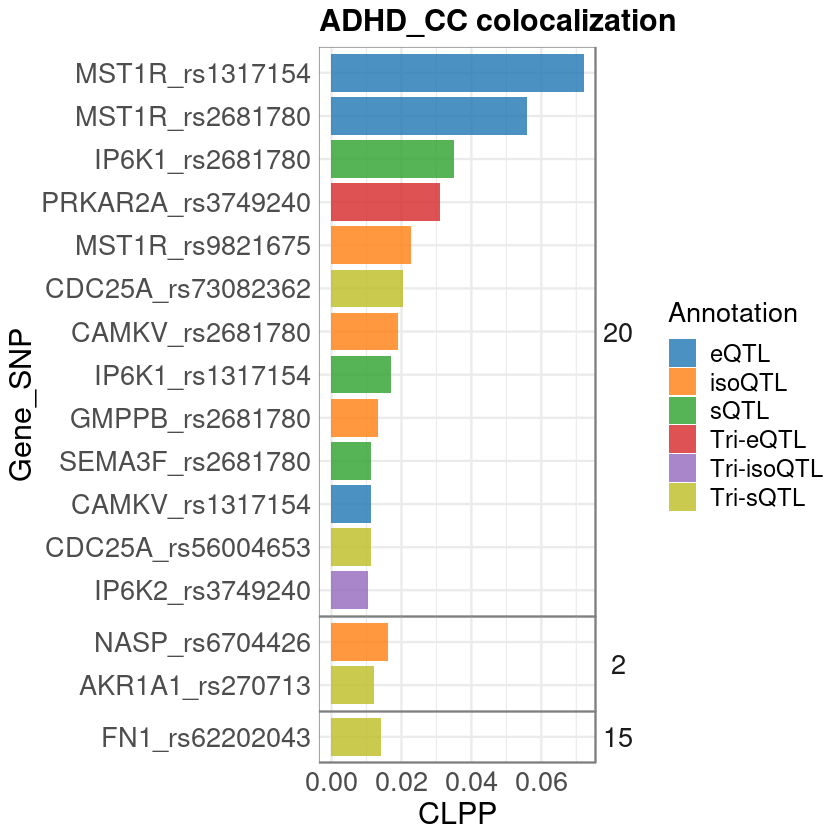

In [123]:
ADHD_CC <- df %>% filter(gwas == "ADHD_CC")
dim(ADHD_CC)

ADHD_CC <- ADHD_CC %>% arrange(CLPP)
ADHD_CC <- ADHD_CC[!duplicated(ADHD_CC$Gene_SNP),]

df_order <- ADHD_CC %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(ADHD_CC$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "ADHD_CC colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/ADHD_CC.pdf", height = 10, width = 8)

[1] 8 5


25 41 
 3  4 

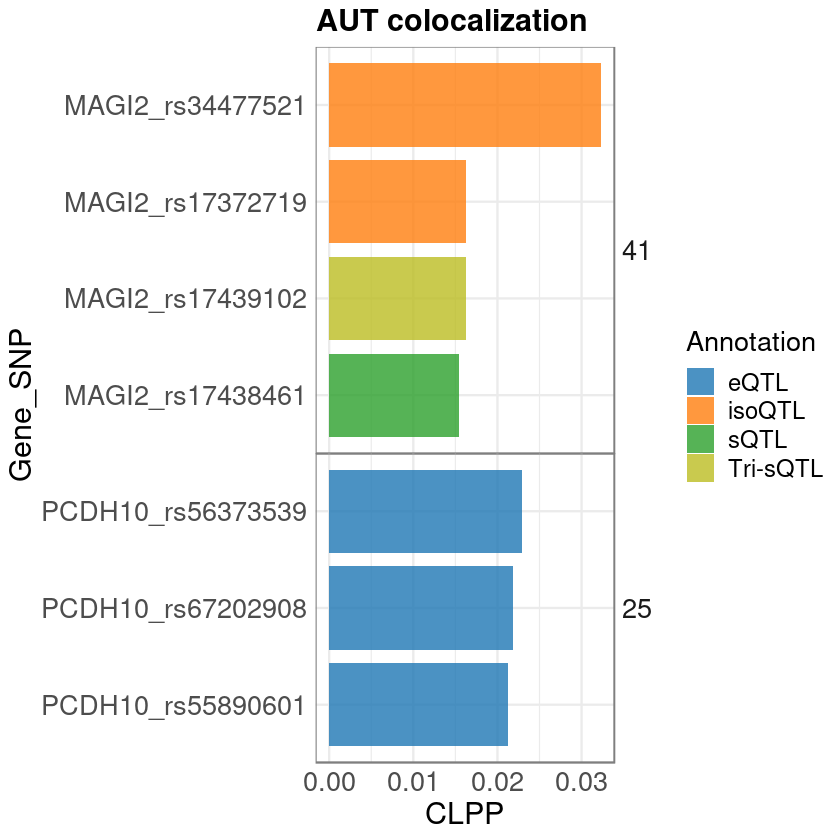

In [124]:
AUT <- df %>% filter(gwas == "AUT")
dim(AUT)

AUT <- AUT %>% arrange(CLPP)
AUT <- AUT[!duplicated(AUT$Gene_SNP),]

df_order <- AUT %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(AUT$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "AUT colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/AUT.pdf", height = 10, width = 8)

[1] 3 5


50 59 
 1  1 

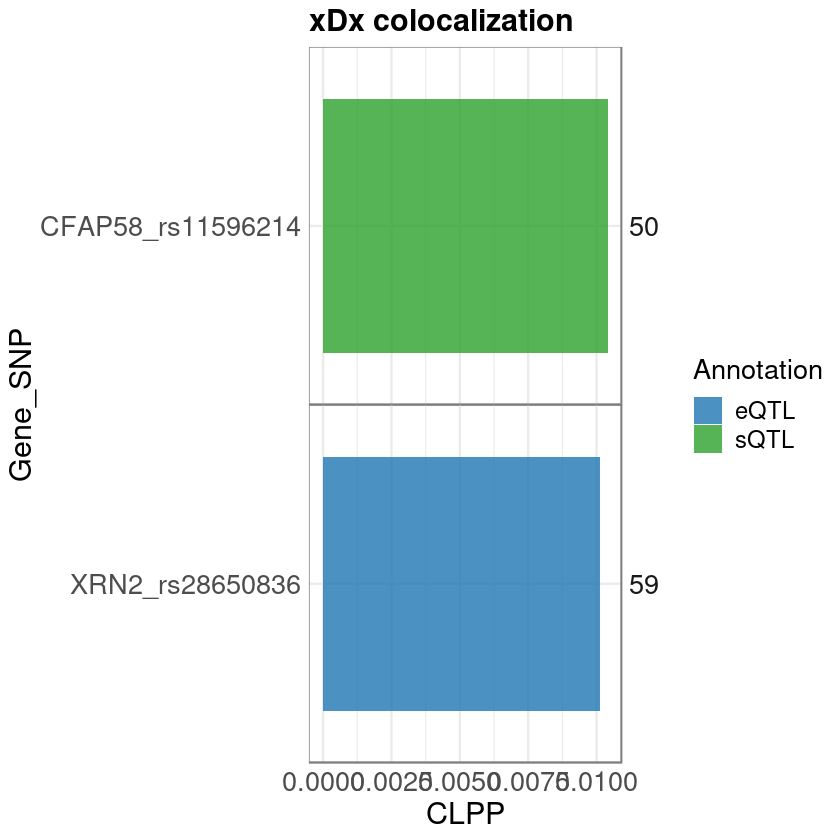

In [128]:
xDx <- df %>% filter(gwas == "xDx")
dim(xDx)

xDx <- xDx %>% arrange(CLPP)
xDx <- xDx[!duplicated(xDx$Gene_SNP),]

df_order <- xDx %>%
            group_by(locus) %>%
            mutate(top = max(CLPP)) %>%
            arrange(top, CLPP) %>%
            as.data.frame()
df_order <- df_order %>% mutate(Gene_SNP = factor(Gene_SNP, levels = Gene_SNP))
df_order <- df_order %>% mutate(locus = factor(locus, levels = unique(locus)))
df_order$locus <- fct_rev(df_order$locus)

table(xDx$locus)

ggplot(df_order, 
       aes(x = CLPP, y = Gene_SNP, fill = Annotation)) +
    geom_bar(stat = "identity", width = 0.85) +
    facet_grid(locus ~ ., scales = "free", space = "free") +
    theme_minimal() + 
    labs(x = "CLPP", y = "Gene_SNP", title = "xDx colocalization") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          strip.text.y = element_text(angle = 0, size = 16),
          panel.spacing = unit(0,"pt"), 
          panel.border = element_rect(colour="grey50", fill = NA)) +
    scale_fill_manual(values = mypal)

ggsave("../figures/xDx.pdf", height = 10, width = 8)